Loan Approval Prediction Project

The objective of this project is to develop a predictive model that determines the likelihood of a bank approving a loan application. By analyzing various applicant attributes—such as loan amount, tenure, credit score, education, and asset holdings.
This project aims to identify key factors influencing loan approval decisions. Additionally, it enables the prediction of approval outcomes for new applicants, allowing financial institutions to streamline their processes and prioritize clients with a higher probability of loan approval as well as the underserved. 

Data Dictionary


Variable	                    Description
no_of_dependents	        Number of dependents of the applicant
education	                Education level of the applicant
self_employed	            If the applicant is self-employed or employed
Incomeannum	            Annual income of the applicant
loan_amount	                Loan amount requested by the applicant
loan_tenure	                Tenure of the loan requested by the applicant (in Years)
CreditScore                 Credit score of the applicant based on their credit history
residential_asset_value	    Value of the residential asset of the applicant
commercial_asset_value	    Value of the commercial asset of the applicant
luxury_asset_value	        Value of the luxury asset of the applicant
bank_assets_value	        Value of the bank asset of the applicant
loan_status	                Status of the loan (Approved/Rejected)


In [109]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st

import warnings
import keras

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib
import tensorflow as tf

In [110]:
# Suppress all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [111]:
# Load data sets 

data = pd.read_csv('loan_approval_dataset.csv')

data.head(20)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [112]:
# Drop irrelevant column

column_to_drop = ['loan_id']
data = data.drop(columns=column_to_drop)
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [113]:
# Get the statistical data

data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [114]:
# checking for the data shape

data.shape

(4269, 12)

In [115]:
# checking for any missing values

data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [116]:
# getting more info on the data type and count of null values if any

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [117]:
# dropping duplicates if there are any

data = data.drop_duplicates()

Feature Engineering 

I would be grouping the assets column into meaningful features by creating new features in other to improve the machine learning model's performance. This involves selecting, modifying, or creating new features to help the model better capture patterns in the data.

Since i would be using neural network, neural network can learn can learn complex relationships , but well engineered features can make training faster and more accurate.

In [118]:
# Feature engineering 

# Grouping the assets to two different categories : Movable assets and immovable assets

#Movable_Assets 
data['movable_assets'] = data[' bank_asset_value'] + data[' luxury_assets_value']


#Immovable Assets
data['immovable_assets'] = data[' residential_assets_value'] + data[' commercial_assets_value'] 

In [119]:
# Drop columns to avoid duplicate

data.drop(columns=[' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'])

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,movable_assets,immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,4100000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,12900000,7100000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,25400000,13600000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,19900000,8900000


Exploratory Data Analysis

During the exploratory data analysis (EDA), I will examine the distribution of each variable to gain insights into their underlying patterns. This will be followed by an assessment of the relationships between the independent variables and the target variable, as well as an analysis of correlations among the features. Through data visualization, I aim to uncover trends, identify potential patterns, and extract hidden insights that could enhance the understanding of the dataset.

Text(0.5, 1.0, 'Dependents')

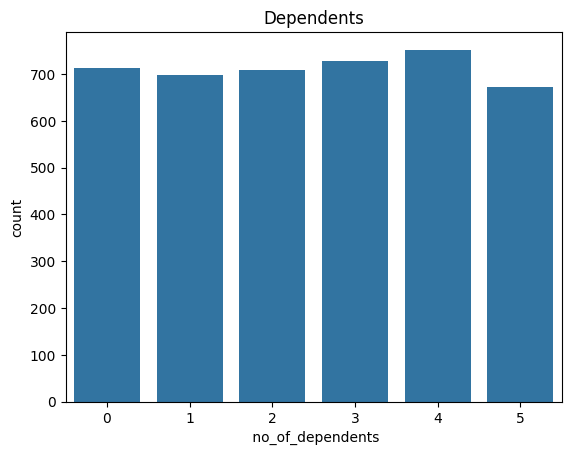

In [120]:
# Exploratory Data analysis
# checking to see if the Number of Dependents has an impact 

sns.countplot( x = ' no_of_dependents', data = data).set_title('Dependents')

This graph above shows the count of applicants who have dependents and also how many dependents each applicant has. There is clearly no distinct difference in the number of dependents held by each applicant. 
From the chart we could see that applicants with 3 and 4 dependents have more count which i can hypothesize that these applicants have lower tendencies to get approved for a loan because there would be more expenditure than disposable income in the household.
I hypothesize that households with a greater number of dependents are less likely to receive loan approval.

<Axes: xlabel=' education', ylabel=' income_annum'>

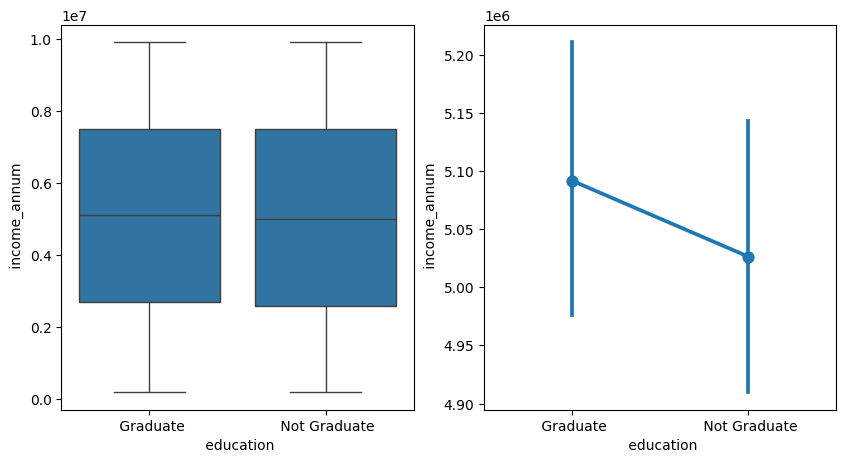

In [121]:
# Check for any outliers

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = data, ax=ax[0])
sns.pointplot(x = ' education', y = ' income_annum', data = data, ax=ax[1])



The plotted charts provide distinct insights into the relationship between education and customer income. 
The boxplot indicates an absence of outliers in the dataset and reveals that both graduates and non-graduates have nearly identical median incomes, with graduates exhibiting only a slight increase. Similarly, the point plot suggests that there is no significant disparity in income levels between graduates and non-graduates. 
I hereby conclude that education does not have a mojor impact on the income of the customer which is a determinant of loan approval

Text(0.5, 1.0, 'Self Employed')

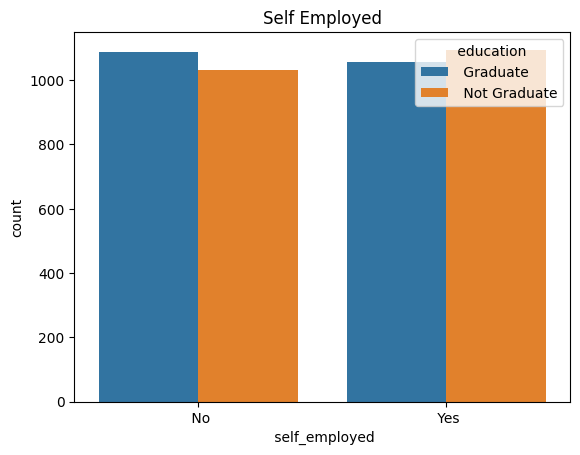

In [122]:
#Relationship between Education and Employment type

sns.countplot(x=' self_employed', data = data, hue = ' education').set_title('Self Employed')

The graph above also shows that there is no difference between the employment of customers along with their education status. The employed graduates tend to have the higher number of count, hence they have a higher number of applicants compared to the graduates and non graduates that are self employed. This could be determining factor for lenders to approve loans because employed applicantes have more stable income and therefore are seen to be able to complete their loan repayment without any potential defaults. In some cases the self employed customers earn more hence are likely to paybck any loan. This could be seen as a great determinant to loan approval

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

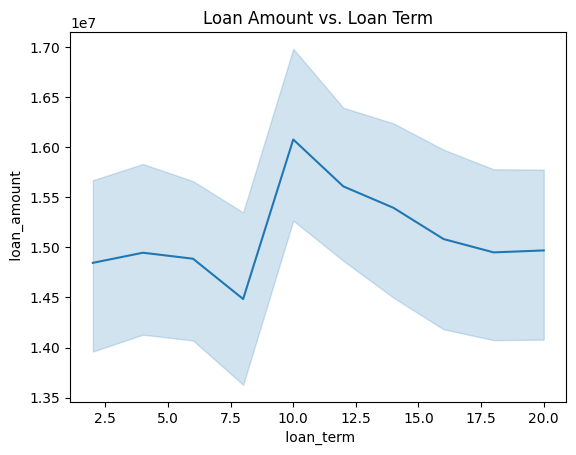

In [123]:
#EDA of Loan amount and loan term

sns.lineplot(x = ' loan_term', y = ' loan_amount', data = data).set_title('Loan Amount vs. Loan Term')


From the graph above it shows that the higher the loan amount, the higher the loan term, e.g  at 10 years of loan term the loan amount was higher. It also shows the higher the loan amount, the higher the loan term this is as a view for the lenders to make more profit. The trend shows from 10 years to 20 years, which necesarily doesnt mean higher amount. 
Therefore this shows the number of long loan term is higher than the shorter loan term without any disparity in the loan amount

<Axes: xlabel=' cibil_score', ylabel='Count'>

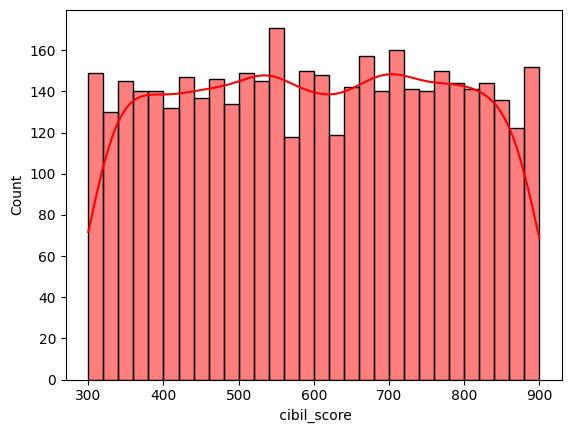

In [124]:
# Cibril score distribution

sns.histplot(data[' cibil_score'], bins = 30, kde = True, color = 'red')

Cibil Score Meaning
300-549 - Poor
550-649 - Fair
650-749 - Good
750-799 - Very Good
800-900 - Excellent

Source: godigit.com

customers with credit score of over 700 have more chances of their loan application to be approved by the lenders because their cibil score is fair and above according to the cibil score ratings and meaning as described above, which is a good sign for the lenders to grant loans with such customers, which the lenders can leverage on the fact they are low risk customers. Thereby Based on the analysis, we hypothesize that customers with a Cibil score exceeding 749 are more likely to have their loan applications approved.

From the chart it shows that some applicants with low cibil score can also be considered for a loan given more contributory features like higher income, Employed applicants. I hypothesize that there other contributory factors that could also determine the applicants with a low cibil score to be approved for a loan. 

Text(0.5, 1.0, 'loan status')

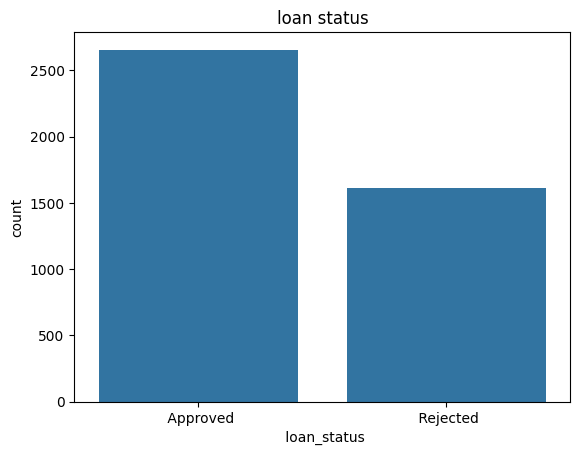

In [125]:
#Loan status 
sns.countplot( x = ' loan_status', data = data).set_title('loan status')


This shows that customers who have been rejected are lower than customers that have been accepted.

<Axes: xlabel='immovable_assets', ylabel='Count'>

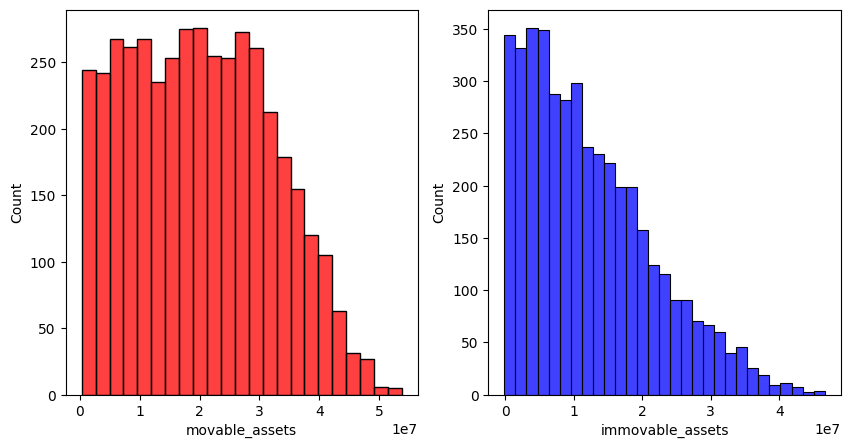

In [126]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data['movable_assets'], ax=ax[0], color='red')
sns.histplot(data['immovable_assets'], ax=ax[1], color='blue')

Looking at the chart above it shows that assets is an essential feature in loan approval. It is used as collateral when the loan is issued and if there are any defaults, the lender takes possession of the assets especially immovable assets(residential and commercial assets). According to the charts you would notice that the majority of people have just one immovable asset and the count of people decreases as the number of the immovable assets increases whilst there is a fluctuating trend of quantity of movable assets.



<Axes: xlabel=' no_of_dependents', ylabel='count'>

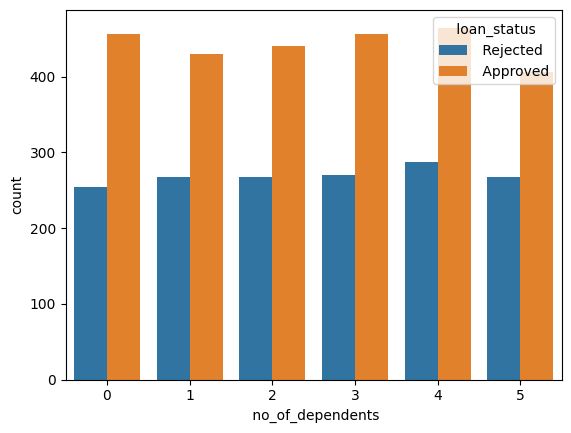

In [127]:
#EDA for relationships between the Target variable which is the Loan status and other variables

# Loan Status and No of dependents
sns.countplot(x = ' no_of_dependents', data = data, hue = ' loan_status')

The chart shows that the higher the number of dependents, the higher the rejection, therefore this shows that the no of dependents of an applicant has an impact on the loan approval of the applicant but it also shows that there is higher approval rate than the rejected even as the no of dependents increase.

Text(0.5, 1.0, 'Loan Status vs Education')

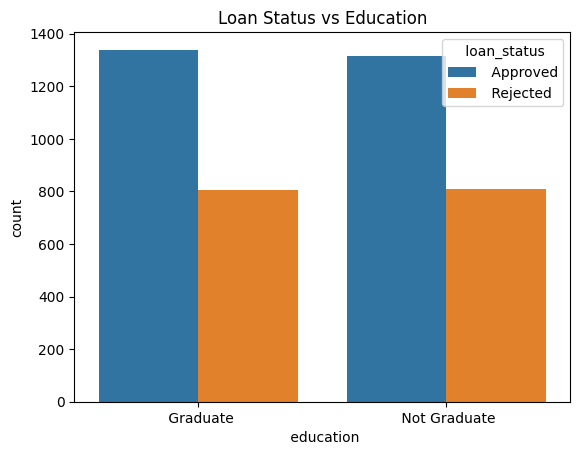

In [128]:
#Education and Loan Status

sns.countplot(x = ' education', hue = ' loan_status', data = data).set_title('Loan Status vs Education')

This shows that there is no impact of education status on loan approval of the applicant. There is no disparity between the loan approval and rejection count for graduates and non graduate applicants. 

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

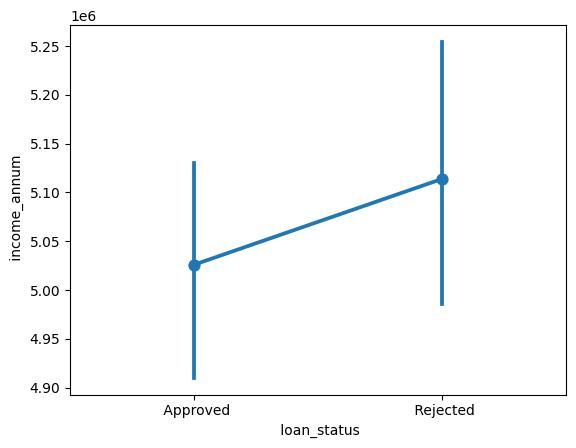

In [129]:
#Loan status and income

sns.pointplot(x=' loan_status', y=' income_annum', data=data)

This shows there is just a little difference between amount of applicants rejected and approved 

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

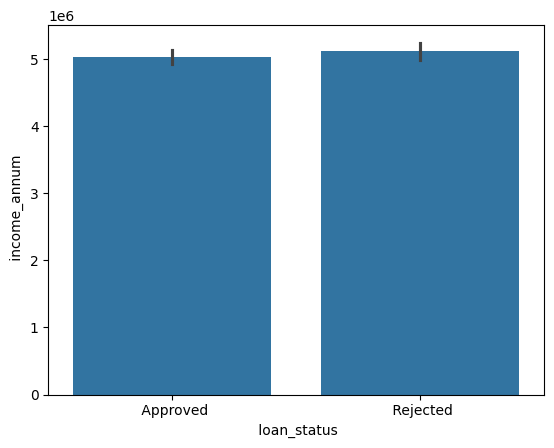

In [130]:
# Loan status and income

sns.barplot(x=' loan_status', y=' income_annum', data=data)

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

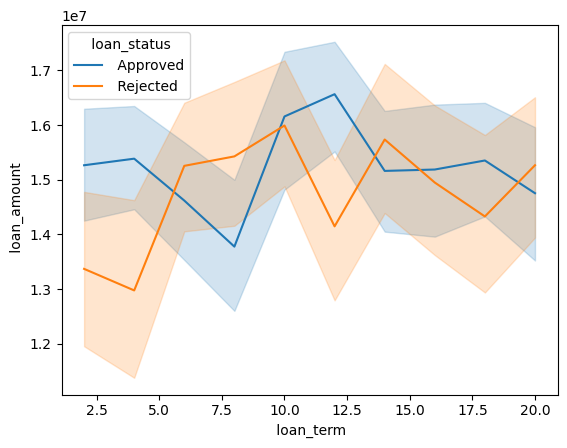

In [131]:
# To check for relationship between the loan term, loan amount and loan status

sns.lineplot(x=' loan_term', y=' loan_amount', data=data, hue=' loan_status')

The above chart shout the relationship between the loan amount, loan term and how it affects the loan status. This shows that the higher the the loan amount and the shorter the term, the higher the chances of approval.
it also shows that the higher the loan term, the higher the loan amount, the applicant stands more chances to be approved compared to if the applicant request for a lower loan amount with a higher loan term, then there is high chance of rejection

For the profitability of the lenders they would likely reject lower amount at a higher loan term which is also evident in the chart above.

My hypothesis is that the higher the loan term the higher the amount could be the way the underserved could stan a better chance to be approved for a loan. Also the lower the loan amount and the shorter the term, the under served stand a chance of being approved for a loan

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

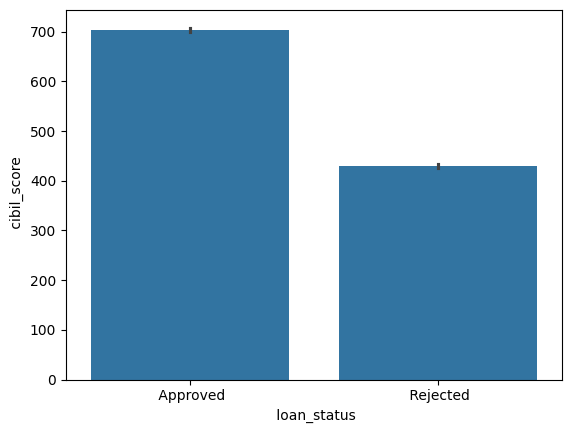

In [132]:
# relationship between the cibril score and the loan status

sns.barplot(x=' loan_status', y=' cibil_score', data=data)

This clearly shows that the the higher the cibil score, the higher the chance of loan approval. It shows the loans rejected are more from teh people of 450 and below

<Axes: xlabel='immovable_assets', ylabel='Count'>

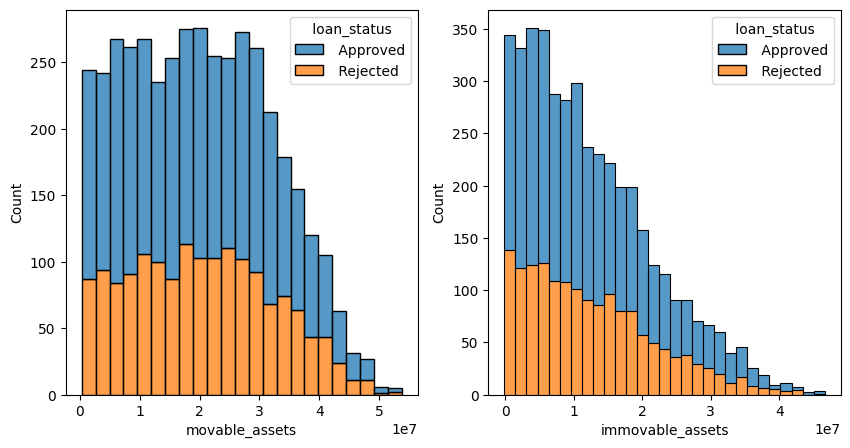

In [133]:
# Assets and Loan status

fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'movable_assets', data = data, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'immovable_assets', data = data, ax=ax[1], hue  = ' loan_status', multiple='stack')

This shows that the more immovable assets an applicant has the lower the chances of rejection . This shows that the more the assets or increase in assets there is a higher chance of the loan to be approved than rejected.

i hypothesise that this could be one of the criterias in serving the underserved. The lenders have more security when the applicant can provide assets either immovable or movable assets. The graph clearly shows.

In [134]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,movable_assets,immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,34400000,20600000


In [135]:
# Label encoding 

# To change the catergorical values to numerical values

encoder = LabelEncoder()


In [136]:
#Label encoding

data[' education_enc'] = encoder.fit_transform(data[' education'])
data[' self_employed_enc'] = encoder.fit_transform(data[' self_employed'])
data[' loan_status_enc'] = encoder.fit_transform(data[' loan_status'])


In [137]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,movable_assets,immovable_assets,education_enc,self_employed_enc,loan_status_enc
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,30700000,20000000,0,0,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,12100000,4900000,1,1,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,46100000,11600000,0,0,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,31200000,21500000,0,0,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,34400000,20600000,1,1,1


In [138]:
data.drop(columns=[' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value', ' loan_status',  ' education', ' self_employed'], inplace=True)

In [139]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,movable_assets,immovable_assets,education_enc,self_employed_enc,loan_status_enc
0,2,9600000,29900000,12,778,30700000,20000000,0,0,0
1,0,4100000,12200000,8,417,12100000,4900000,1,1,1
2,3,9100000,29700000,20,506,46100000,11600000,0,0,1
3,3,8200000,30700000,8,467,31200000,21500000,0,0,1
4,5,9800000,24200000,20,382,34400000,20600000,1,1,1


<Axes: >

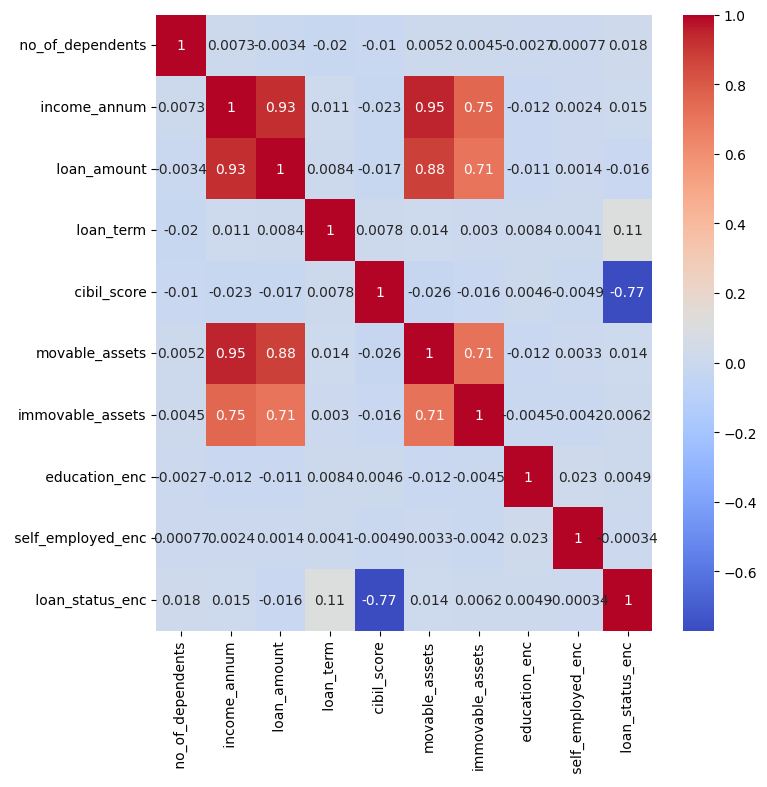

In [140]:
# Plotting a matrix map to check for correlations

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True,cmap='coolwarm')

According to the matrix heat map it shows that there various correlations between the movable and immovable assets
also a correlation between the income and assets, loan status and the credit score, loan amoount and income

This all boils down to the factors that influence loan approvals, which are:

income, immovable and movable assets, credit score. 

Text(0.5, 1.0, 'immovable_assets vs loan_amount')

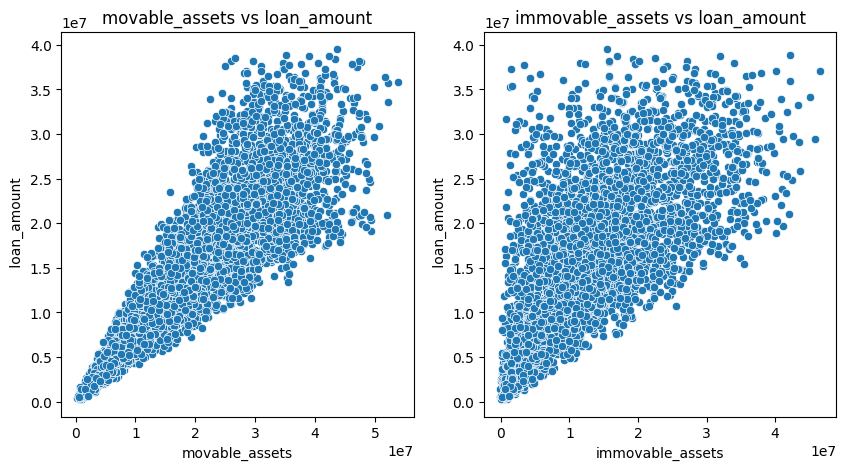

In [141]:
#Exploring the relationship between the movable and immovable assets

fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='movable_assets', y = ' loan_amount', data = data, ax=ax[0]).set_title('movable_assets vs loan_amount')
sns.scatterplot(x='immovable_assets', y = ' loan_amount', data = data, ax=ax[1]).set_title('immovable_assets vs loan_amount')

This shows that the more the assets the more the loan that is issued by the lender

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

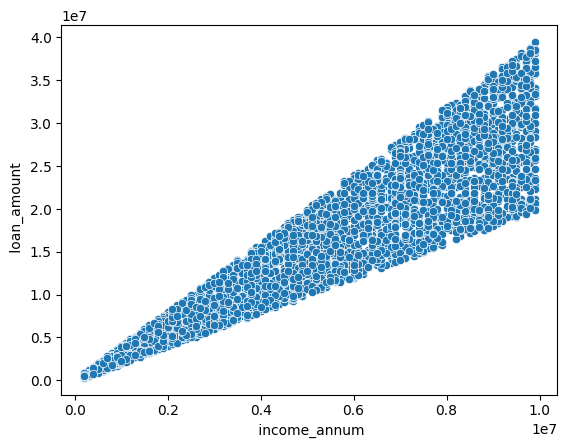

In [142]:
#Exploring the relationship between income and loan amount

sns.scatterplot(x=' income_annum', y = ' loan_amount', data = data)

The above chart shows that the higher the income , the higher the loan amount. This shows that the loan is a high determinant to loan approval

In [143]:
# Identify dependent and independent variable

x = data.drop([' loan_status_enc'],axis=1)
y = data[' loan_status_enc']


In [144]:
# Scale the data inother to avoid any bias

scaler = StandardScaler()

# Fit and transform the data
x_scaled = scaler.fit_transform(x)


In [145]:
# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler has been re-saved successfully!")

Scaler has been re-saved successfully!


In [146]:
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [147]:
# train the model
#splitting the data set into test and train data set inother to avoid data leakage

## train-test split 
x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=32)

In [148]:
# Using the decision tree classifier 
# Creating a decision tree classifier

decision_tree_gini = DecisionTreeClassifier()

#Using entropy criterion

decision_tree_ent = DecisionTreeClassifier(criterion ='entropy')

#Use a max depth

decision_tree_depth = DecisionTreeClassifier( max_depth=3)


In [149]:
# Fit the trees

decision_tree_gini.fit(x_train, y_train)
decision_tree_ent.fit(x_train, y_train)
decision_tree_depth.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [150]:
# making predictions 

y_pred_gini = decision_tree_gini.predict(x_test)

y_pred_ent = decision_tree_ent.predict(x_test)

yt_pred_depth = decision_tree_depth.predict(x_test)

In [151]:
# Measuring accuracy

print('Accuracy(gini)',metrics.accuracy_score(y_test, y_pred_gini))

print('Accuracy(ent)',metrics.accuracy_score(y_test, y_pred_ent))

print('Accuracy(depth)',metrics.accuracy_score(y_test, yt_pred_depth))

Accuracy(gini) 0.977751756440281
Accuracy(ent) 0.9836065573770492
Accuracy(depth) 0.9660421545667447


In [152]:
# Save the Decision tree  model
with open('decisiontree.pkl', 'wb') as f:
    pickle.dump(decision_tree_ent, f)

print("model has been re-saved successfully!")


model has been re-saved successfully!


In [153]:
print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       537
           1       0.99      0.97      0.98       317

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [154]:
# Put in a data frame Actual vs Predicted

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ent})

,Actual,Predicted
2952,1,1
2361,1,1
1522,0,0
1688,0,0
2432,0,0
...,...,...
3073,1,1
28,1,1
3059,1,1
4181,1,1


In [155]:
## CONFUSION MATRIX to measure accuracy

conf_mat = confusion_matrix(y_test, y_pred_ent)

print(conf_mat)

[[533   4]
 [ 10 307]]


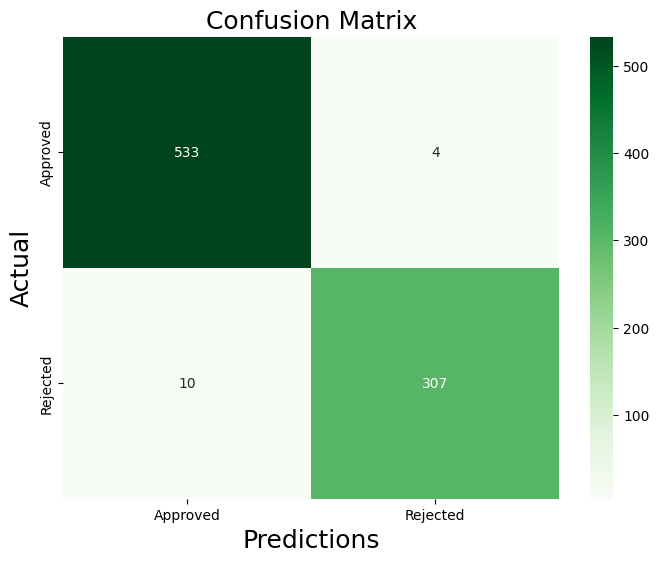

In [156]:
# Create labels
labels = ['Approved', 'Rejected']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [157]:
#Model evaluation 

auc = roc_auc_score(y_test, y_pred_ent)
print('AUC: %f' %auc)

AUC: 0.980503


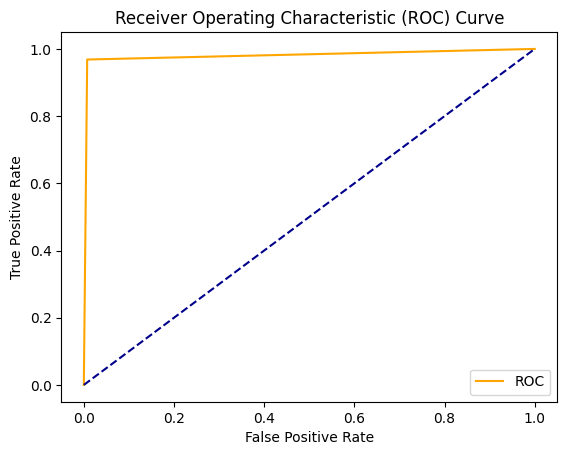

In [158]:


fpr, tpr = roc_curve(y_test, y_pred_ent)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [159]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [160]:
#predict on the test data
y_pred_log = log_reg.predict(x_test)
y_pred_log

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [161]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.9133489461358314
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       537
           1       0.88      0.88      0.88       317

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [162]:
#Training the model using Random forest classifier

rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=32)

In [163]:
# Making predictions 

y_pred_rf = rf.predict(x_test)
y_pred_rf

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [164]:
# Model evaluation 

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.977751756440281
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       537
           1       0.98      0.96      0.97       317

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [165]:
# Put in a data frame actual vs predicted

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
2952,1,1
2361,1,1
1522,0,0
1688,0,0
2432,0,0
...,...,...
3073,1,0
28,1,1
3059,1,1
4181,1,1


In [166]:
# Save the Random forest model
with open('RandomForest.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("model has been re-saved successfully!")

model has been re-saved successfully!


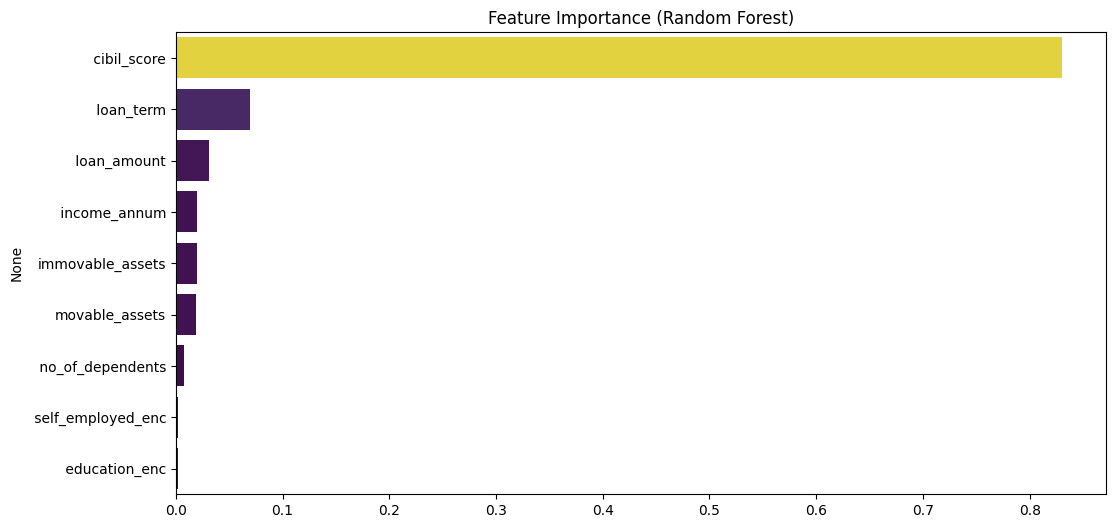

In [167]:
# Feature importance
importances = rf.feature_importances_
features = x.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx], hue=importances[sorted_idx], palette="viridis", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [168]:
## CONFUSION MATRIX to measure model accuracy

conf_mat = confusion_matrix(y_test,y_pred_rf)

print(accuracy)
print(conf_mat)

0.977751756440281
[[531   6]
 [ 13 304]]


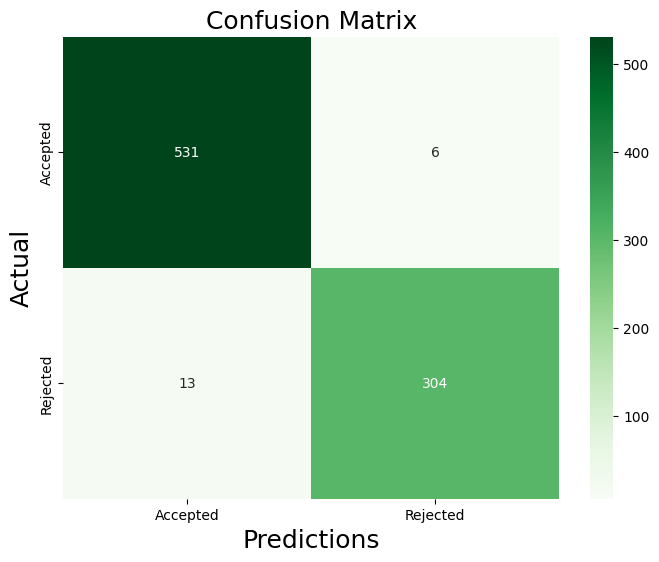

In [169]:
# Create labels
labels = ['Accepted', 'Rejected']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [170]:
# Model evaluation using AUC

auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %f' %auc)

AUC: 0.973909


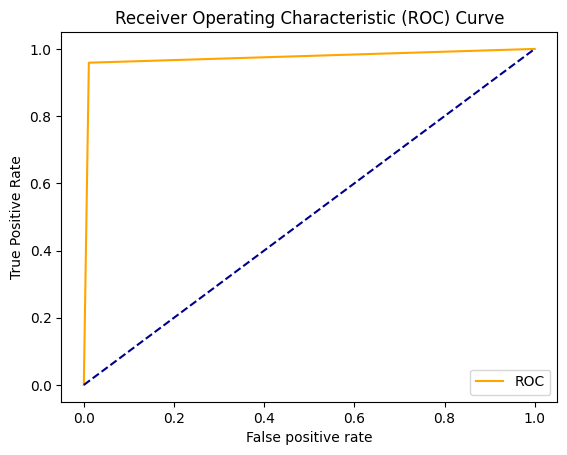

In [171]:
# Measuring model accuracy using ROC 

fpr, tpr = roc_curve(y_test, y_pred_rf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

Conclusion

This shows that Decision tree model was the best with 98% Accuracy followed by Random Forrest with 97% Accuracy in model predictions.
From the above analysis using Exploratory data and also Machine Learning we have highlighted this facts below 

The current criteria for loan Rejection especially for the underserved is currently 

* Low Income
* Unstable Employment
* Limited Cibil Report (Credit Report)
* High Dependents

Currently the Highest factor that contributes to loan approval is Credit score (cibil Score) 

The potential Bias for Approval for Underserved applicants

* Low income despite other strong factors like having assets

Recommendation

* To develop alternative creditworthiness model like

= Employment Consistency
= Savings Pattern 
= Expenditure trend
= Rental payment History

* Introduce weighted scoring that accounts for income stability rather than absolute income like Assets.

* Model Recommendation 

= The Model to recommend personalised loan options for underserved applicants

* Lower Interest and longer loan terms for the higher risk but potential credit worthy applicants

= Higher interst rate and shorter loan terms for the high risk applicants pending further exploration on things like their expenditure

* Financial Inclusion insights for lenders to support underserved applicants e.g offering flexible loans